In [ ]:
import numpy as np

np.set_printoptions(precision=2)
import matplotlib.pyplot as plt

plt.style.use("./deeplearning.mplstyle")

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
def load_house_data():
    data = np.loadtxt("./houses.txt", delimiter=",", skiprows=1)
    X = data[:, :4]
    y = data[:, 4]
    return X, y

In [ ]:
# Load the dataset
X_train, y_train = load_house_data()
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

In [ ]:
# Scale/normalize the training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X: {np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in Raw        X: [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X: [5.8452591  6.13529646 2.05626214 3.68533012]


In [ ]:
# Create and fit the regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(
    f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}"
)
# for k, v in sgdr.get_params().items():
#     print(f"{k}={v}")

SGDRegressor()
number of iterations completed: 111, number of weight updates: 10990.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print("model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [109.90489609 -20.92695952 -32.30798688 -38.1057358 ], b:[363.1791354]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(
    f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}"
)

print(f"Prediction on training set:\n{y_pred[:4]}")
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.174678   485.924996   389.69324959 492.08556642]
Target values 
[300.  509.8 394.  540. ]


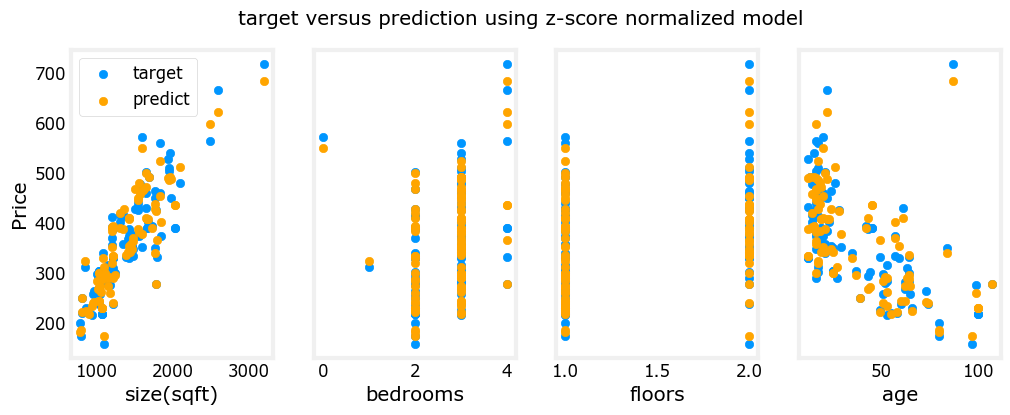

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred, color="orange", label="predict")
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()